# Capstone Project-Car Accident Severity (Week 1)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Car Accident Severity <a name="introduction"></a>

Motor vehicle accidents continue to be one of the leading causes of accidental deaths and injuries in the United States. It is estimated more than six million car accidents occur each year in the U.S according to the NHTSA and about 6% of all motor vehicle accidents in the United States result in at least one death.
Roughly 27% of all vehicle accidents result in nonfatal injuries. However, some of these injuries can cause tremendous pain or lead to permanent disabilities.
In this project we will leverage the accident data of "Seattle city" to predict the different accidents' severity.
Our project can be a valuable asset to Governments, states, provinces and municipalities which could our model 
in the context of road accident prevention,but also to identify key factors that can lead to a road accident,
and consequently, help elaborate new policies.Goverment agencies can also use this data to warn you, given the weather and the road conditions about the possibility of you getting into a car accident and severity of it.This can enable the driver to drive more carefully or even change his travel plans.



## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* Number of people and number of vehicles involved in the accident.
* Location,whether,road and light conditions are also infudencial factors.
* Speed of car and junctions are another factors we would consider.


The Following data source will be needed to extract/generate the required information:
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

The dataset contains details of car accidents which have taken place within the city of Seattle, Washington in the past fifteen years(2004-2020).The dataset is highly extensive and contains all details of above mentioned factors.






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins


In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
 list(df.columns)


['SEVERITYCODE',
 'X',
 'Y',
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE.1',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR']

In [4]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


In [5]:
df.drop([
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'SEVERITYCODE.1',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
  'PEDCOUNT',
 'PEDCYLCOUNT',
 'LOCATION',
 'SEVERITYDESC',
 'COLLISIONTYPE',

 
 'INCDATE',
 'INCDTTM',
 
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR']
, axis = 1, inplace = True) 


In [6]:
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),0,Raining,Wet,Daylight,NaN


In [7]:
severity_code = df['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df ["SEVERITYCODE"] = severity_code

In [8]:
severitycount=df['SEVERITYCODE'].value_counts()
print(severitycount)



0    136485
1     58188
Name: SEVERITYCODE, dtype: int64


Text(0.5, 1.0, 'SEVERITY OF ACCIDENTS SEATTLE,WASHINGTON')

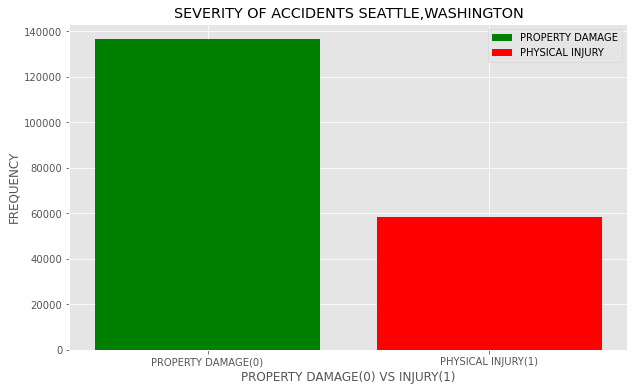

In [9]:
plt.figure(figsize=[10,6])
plt.bar(['PROPERTY DAMAGE(0)'], [136485], label = "PROPERTY DAMAGE", color = 'g', width=0.8)
plt.bar(['PHYSICAL INJURY(1)'], [58188], label = "PHYSICAL INJURY", color = 'r', width=0.8)
plt.legend()
plt.xlabel("PROPERTY DAMAGE(0) VS INJURY(1)")
plt.ylabel("FREQUENCY")
plt.title("SEVERITY OF ACCIDENTS SEATTLE,WASHINGTON")



In [10]:
weathercount=df['WEATHER'].value_counts()
print(weathercount)

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


In [37]:
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 1 , inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Unknown", 0, inplace=True)
df["WEATHER"].replace("Snowing",2, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain",2, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)
df["WEATHER"].replace("Other", 0, inplace=True)

weathercount=df['WEATHER'].value_counts()
print(weathercount)


0.0    127058
1.0     60864
2.0      1670
Name: WEATHER, dtype: int64


In [38]:
group_names = ['Clear', 'Raining/Overcast', 'Snow/Hail']

Text(0.5, 1.0, 'WEATHER CONDITIONS')

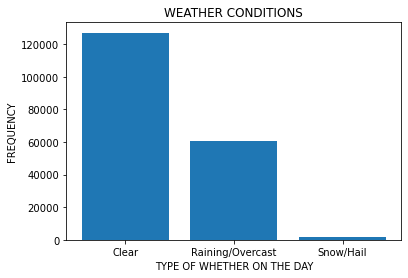

In [39]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["WEATHER"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("TYPE OF WHETHER ON THE DAY")
plt.pyplot.ylabel("FREQUENCY")
plt.pyplot.title("WEATHER CONDITIONS")

In [40]:
roadcount=df['ROADCOND'].value_counts()
print(roadcount)

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64


In [41]:
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 1, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 2, inplace=True)
df["ROADCOND"].replace("Unknown", 0, inplace=True)
df["ROADCOND"].replace("Standing Water", 1, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 2, inplace=True)
df["ROADCOND"].replace("Oil", 1, inplace=True)
df["ROADCOND"].replace("Other", 0, inplace=True)

roadcount=df['ROADCOND'].value_counts()
print(roadcount)

0.0    139720
1.0     47653
2.0      2288
Name: ROADCOND, dtype: int64


In [42]:
group_names1 =['DRY', 'WET', 'SNOW/ICE']


Text(0.5, 1.0, 'ROAD CONDITION')

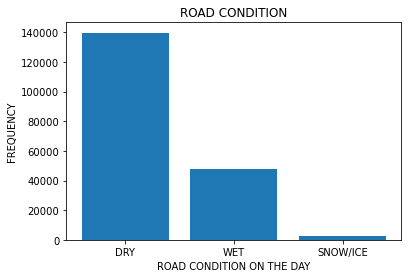

In [43]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names1,roadcount),

# set x/y labels and plot title
plt.pyplot.xlabel("ROAD CONDITION ON THE DAY")
plt.pyplot.ylabel("FREQUENCY")
plt.pyplot.title("ROAD CONDITION")

In [44]:
lightcount=df['LIGHTCOND'].value_counts()
print(lightcount)

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


In [45]:
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Unknown", 0, inplace=True)
df["LIGHTCOND"].replace("Other", 0, inplace=True)

lightcount=df['LIGHTCOND'].value_counts()
print(lightcount)


0.0    129845
1.0     56911
2.0      2747
Name: LIGHTCOND, dtype: int64


Text(0.5, 1.0, 'LIGHT CONDITION')

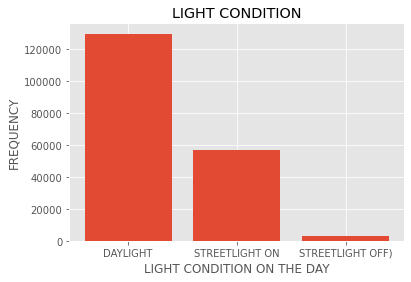

In [96]:
group_names2 =['DAYLIGHT', 'STREETLIGHT ON','STREETLIGHT OFF)']

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names2,lightcount),

# set x/y labels and plot title
plt.pyplot.xlabel("LIGHT CONDITION ON THE DAY")
plt.pyplot.ylabel("FREQUENCY")
plt.pyplot.title("LIGHT CONDITION")

In [13]:
df['PERSONCOUNT'] = np.where(df['PERSONCOUNT'] >2, 3, df['PERSONCOUNT'])
personcount=df['PERSONCOUNT'].value_counts()
print(personcount)






2    114231
3     61744
1     13154
0      5544
Name: PERSONCOUNT, dtype: int64


AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

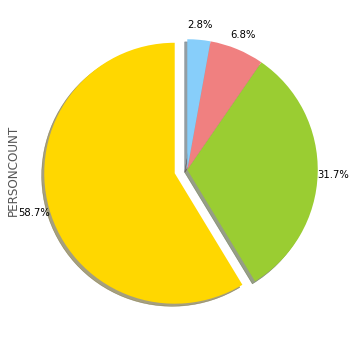

In [14]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',]
explode_list = [0.1, 0, 0, 0,] # ratio for each continent with which to offset each wedge.
Label_list=['2 Persons Involved','Three or more than three Persons Involved','Only one person involved','No person involved']
personcount.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 numbers
                            )
 
plt.pyplot.legend(Label_list,bbox_to_anchor=(1.7,1), loc="upper right", 
                          )
plt.pyplot.title("No of People Involved in the accident")


In [126]:
vehcount=df['VEHCOUNT'].value_counts()



In [128]:
df['VEHCOUNT'] = np.where(df['VEHCOUNT'] >2, 3, df['VEHCOUNT'])
vehcount=df['VEHCOUNT'].value_counts()
print(vehcount)





2    147650
1     25748
3     16190
0      5085
Name: VEHCOUNT, dtype: int64


Text(0.5, 1.0, 'No of Vechicles involved in the accident')

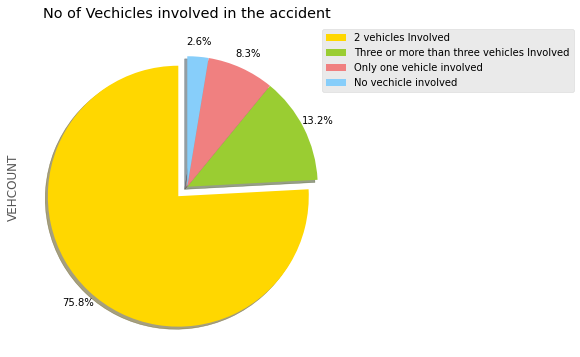

In [129]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',]
explode_list = [0.1, 0, 0, 0,] # ratio for each continent with which to offset each wedge.
Label_list=['2 vehicles Involved','Three or more than three vehicles Involved','Only one vehicle involved','No vechicle involved']
vehcount.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 numbers 
                            )
 
plt.pyplot.legend(Label_list,bbox_to_anchor=(1.7,1), loc="upper right", 
                          )
plt.pyplot.title("No of Vechicles involved in the accident")

In [78]:
junctioncount=df['JUNCTIONTYPE'].value_counts()
print(junctioncount)


Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64


In [130]:
df["JUNCTIONTYPE"].replace("Mid-Block (not related to intersection)", 1, inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 0, inplace=True)
df["JUNCTIONTYPE"].replace("Mid-Block (but intersection related)", 0, inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", 1, inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)",1, inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction", 1, inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", 1, inplace=True)
junctioncount=df['JUNCTIONTYPE'].value_counts()
print(junctioncount)


1.0    102744
0.0     85600
Name: JUNCTIONTYPE, dtype: int64


Text(0.5, 1.0, 'JUNCTION TYPE')

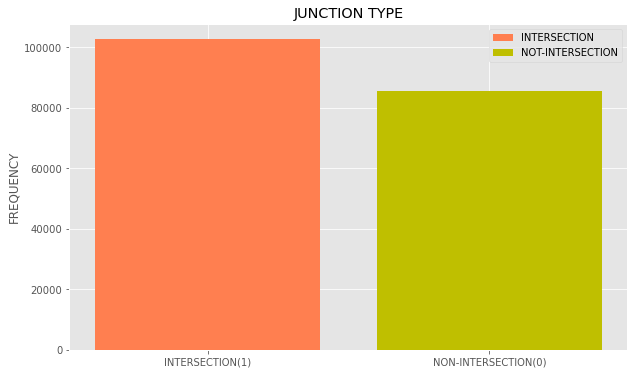

In [12]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


plt.figure(figsize=[10,6])
plt.bar(['INTERSECTION(1)'], [102744], label = "INTERSECTION", color = 'coral', width=0.8)
plt.bar(['NON-INTERSECTION(0)'], [85600], label = "NOT-INTERSECTION", color = 'y', width=0.8)
plt.legend()
plt.xlabel('')
plt.ylabel("FREQUENCY")
plt.title("JUNCTION TYPE")

In [131]:
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

In [132]:
duicount=df['UNDERINFL'].value_counts()
print(duicount)

0    100274
0     80394
1      5126
1      3995
Name: UNDERINFL, dtype: int64


Text(0.5, 1.0, 'NO OF ACCIDENTS IN WHILE DRIVING UNDER INFUENCE')

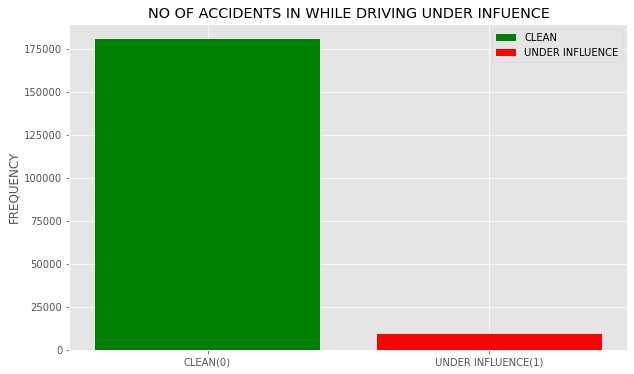

In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


plt.figure(figsize=[10,6])
plt.bar(['CLEAN(0)'], [180668], label = "CLEAN", color = 'g', width=0.8)
plt.bar(['UNDER INFLUENCE(1)'], [9121], label = "UNDER INFLUENCE", color = 'r', width=0.8)
plt.legend()
plt.xlabel("")
plt.ylabel("FREQUENCY")
plt.title("NO OF ACCIDENTS IN WHILE DRIVING UNDER INFUENCE")

In [133]:
speedingcount=df['SPEEDING'].value_counts()
print(speedingcount)

0.0    185340
1.0      9333
Name: SPEEDING, dtype: int64


In [134]:
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)

Text(0.5, 1.0, 'Percentage of Accidents Caused by Overspeeding')

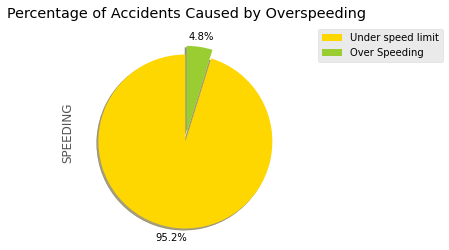

In [137]:
colors_list = ['gold', 'yellowgreen',]
explode_list = [0.1, 0,] # ratio for each continent with which to offset each wedge.
Label_list=['Under speed limit','Over Speeding',]
speedingcount.plot(kind='pie',
                            figsize=(10, 4),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 numbers 
                            )
 
plt.pyplot.legend(Label_list,bbox_to_anchor=(1.7,1), loc="upper right", 
                          )
plt.pyplot.title("Percentage of Accidents Caused by Overspeeding")

In [84]:
df.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
PERSONCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE    float64
UNDERINFL        object
WEATHER         float64
ROADCOND        float64
LIGHTCOND       float64
SPEEDING        float64
dtype: object

In [85]:
df.replace("?", np.nan, inplace = True)
df.head(5)
missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64



In [86]:
df.dropna(subset=["PERSONCOUNT","VEHCOUNT","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING"], axis=0, inplace=True)
df.shape


(183196, 11)

In [87]:
Feature = df[["PERSONCOUNT","VEHCOUNT","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING"]].values


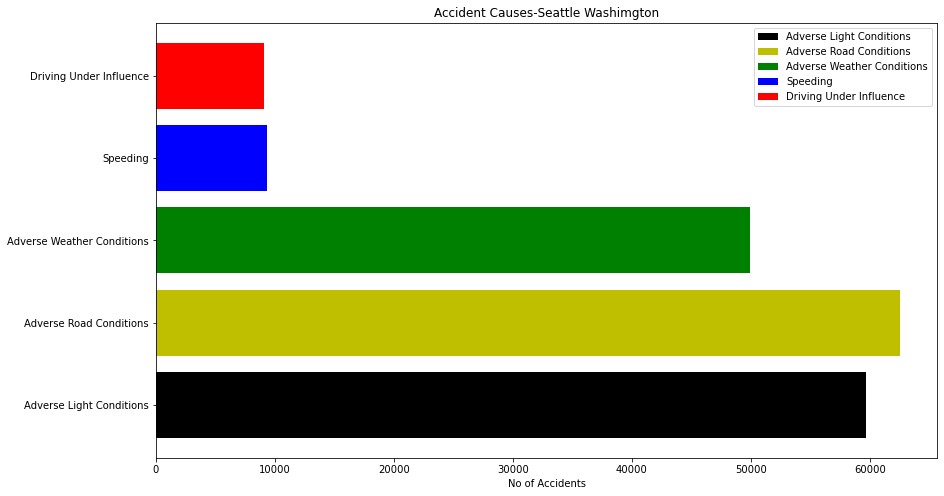

In [25]:
# Importing the matplotlib library
import matplotlib.pyplot as plt
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[14, 8],)
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(['Adverse Light Conditions'],[59658], label = "Adverse Light Conditions", color = 'k',)
plt.barh(['Adverse Road Conditions'], [62534], label = "Adverse Road Conditions", color = 'y',)
plt.barh(['Adverse Weather Conditions'], [49941], label = "Adverse Weather Conditions", color = 'g',)
plt.barh(['Speeding'],[9333], label = "Speeding", color = 'b', )
plt.barh(['Driving Under Influence'],[9121], label = "Driving Under Influence", color = 'r', )
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('No of Accidents')
plt.ylabel('')
# Giving the tilte for the plot
plt.title('Accident Causes-Seattle Washimgton')
# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

In [68]:
X = Feature
X[0:5]

array([[2, 2, 0.0, 0, 1.0, 1.0, 0.0, 0.0],
       [2, 2, 1.0, '0', 1.0, 1.0, 1.0, 0.0],
       [3, 3, 1.0, '0', 1.0, 0.0, 0.0, 0.0],
       [3, 3, 1.0, 0, 0.0, 0.0, 0.0, 0.0],
       [2, 2, 0.0, '0', 1.0, 1.0, 0.0, 0.0]], dtype=object)

In [69]:
y = df['SEVERITYCODE'].values
y[0:5]

array([1, 0, 0, 0, 1])

In [70]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(int))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.30917831,  0.10830624, -1.09155714, -0.22734127,  1.3276869 ,
         1.51321846, -0.66562127, -0.23007671],
       [-0.30917831,  0.10830624,  0.91612245, -0.22734127,  1.3276869 ,
         1.51321846,  1.33037091, -0.23007671],
       [ 1.1568938 ,  2.21169538,  0.91612245, -0.22734127,  1.3276869 ,
        -0.58981506, -0.66562127, -0.23007671],
       [ 1.1568938 ,  2.21169538,  0.91612245, -0.22734127, -0.69830936,
        -0.58981506, -0.66562127, -0.23007671],
       [-0.30917831,  0.10830624, -1.09155714, -0.22734127,  1.3276869 ,
         1.51321846, -0.66562127, -0.23007671]])

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (146556, 8) (146556,)
Test set: (36640, 8) (36640,)


In [72]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.5826980984571006
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.5826980772678851
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.5826972002741603
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.5826980872867948
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.5826977486074866


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.5826896350312154
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.5826895920823781
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5826820201827667
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.5826896359009541
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.5826896463253558


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.5826961850196422
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.5826960596682123
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.582731376284626
Test 14: Accuracy at C = 0.001 wh

Text(0, 0.5, 'Testing Accuracy')

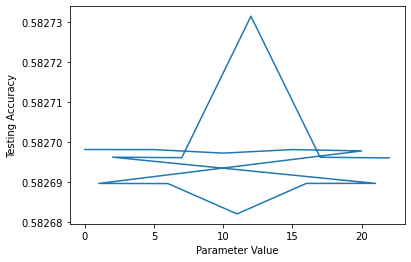

In [74]:
lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [75]:
lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, lr_yhat)

0.7177128820960699

In [94]:
print (classification_report(y_test, lr_yhat))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82     25221
           1       0.66      0.19      0.30     11419

   micro avg       0.72      0.72      0.72     36640
   macro avg       0.69      0.57      0.56     36640
weighted avg       0.70      0.72      0.66     36640



In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, lr_yhat, labels=[1,0]))

[[ 2175  9244]
 [ 1099 24122]]


Confusion matrix, without normalization
[[ 2175  9244]
 [ 1099 24122]]


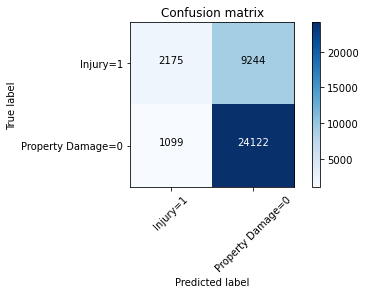

In [100]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lr_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(X, y, test_size=0.2, random_state=4)
print('Trainset: ',X_traindt.shape,y_traindt.shape)
print('Testset: ',X_testdt.shape,y_testdt.shape)

Trainset:  (146556, 8) (146556,)
Testset:  (36640, 8) (36640,)


In [77]:
Tree = DecisionTreeClassifier(criterion = "entropy", max_depth=4).fit(X_traindt,y_traindt)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
predTree=Tree.predict(X_testdt)
print("Decision Tree's Accuracy : ",metrics.accuracy_score(y_testdt,predTree))

Decision Tree's Accuracy :  0.7372816593886463


In [98]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,predTree)

0.7372816593886463

In [95]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83     25221
           1       0.73      0.25      0.37     11419

   micro avg       0.74      0.74      0.74     36640
   macro avg       0.73      0.60      0.60     36640
weighted avg       0.74      0.74      0.69     36640



In [101]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predTree, labels=[1,0]))

[[ 2836  8583]
 [ 1043 24178]]


Confusion matrix, without normalization
[[ 2836  8583]
 [ 1043 24178]]


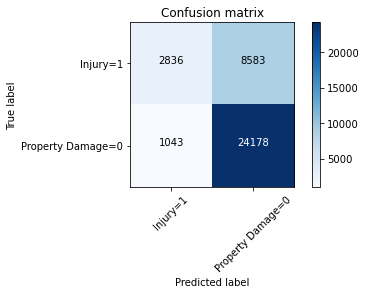

In [102]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [79]:
from sklearn.model_selection import train_test_split
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split(X, y, test_size=0.2, random_state=4)
print('Trainset: ',X_trainknn.shape,y_trainknn.shape)
print('Testset: ',X_testknn.shape,y_testknn.shape)

Trainset:  (146556, 8) (146556,)
Testset:  (36640, 8) (36640,)


k = 1 has a Score = 0.6589519650655021 
k = 2 has a Score = 0.7004093886462882 
k = 3 has a Score = 0.6605622270742358 
k = 4 has a Score = 0.6906659388646288 
k = 5 has a Score = 0.674235807860262 
k = 6 has a Score = 0.7037390829694323 
k = 7 has a Score = 0.6885371179039301 
k = 8 has a Score = 0.7265829694323144 
k = 9 has a Score = 0.7052674672489083 


Text(0, 0.5, 'Testing Accuracy Values')

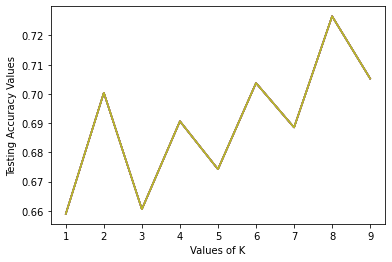

In [83]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))
    
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

    plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [84]:
knn_model = knn(n_neighbors = 7)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [96]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,knn_yhat)

0.6885371179039301

In [97]:
print (classification_report(y_test,knn_yhat))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     25221
           1       0.50      0.47      0.48     11419

   micro avg       0.69      0.69      0.69     36640
   macro avg       0.63      0.63      0.63     36640
weighted avg       0.68      0.69      0.69     36640



In [104]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,knn_yhat, labels=[1,0]))

[[ 5337  6082]
 [ 5330 19891]]


Confusion matrix, without normalization
[[ 5337  6082]
 [ 5330 19891]]


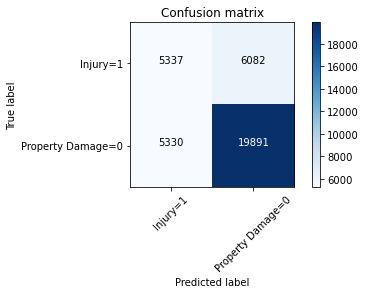

In [105]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,knn_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')